# Titanic Dataset: Predicting Passenger's Survival
### by Faris Rizky Andika

Di notebook ini, saya mengerjakan seluruh proses machine learning secara end-to-end, dari mulai data cleaning sampai model evaluation dengan hyperparameter tuning, dengan dataset Titanic. Dataset Titanic berisikan data informasi orang-orang yang berada di kapal Titanic pada saat melakukan perjalanan menuju New York City di awal abad ke-20.   

## Pendahuluan

Titanic merupakan sebuah kapal penumpang super Britania Raya yang tenggelam di Samudra Atlantik dalam perjalanannya dari kota Southampton, Inggris menuju kota New York City, Amerika Serikat pada tanggal 15 April 1912. Kapal ini tenggelam setelah insiden tabrakan dengan gunung es. Titanic merupakan kapal terbesar di dunia pada pelayaran perdananya dan tragedi tenggelamnya kapal Titanic ini merupakan salah satu bencana maritim paling mematikan sepanjang sejarah yang mengakibatkan kematian sebanyak 1514 orang.

Penumpang kapal Titanic terdiri dari sejumlah orang terkaya dan terhormat di dunia, serta lebih dari seribu emigran yang hendak mencari kehidupan baru di Amerika Utara. Walaupun memiliki fasilitas mewah dan sistem keamanan yang maju pada jamannya, Titanic tidak memiliki sekoci yang cukup untuk menampung seluruh penumpang kapal. Kapal ini memiliki sejumlah sekoci yang hanya mampu menampung 1.178 penumpang.

Karena sistem evakuasi bencana di Kapal Titanic yang tidak memadai, tragedi Titanic memakan banyak korban jiwa, namun tidak sedikit juga penumpang atau awak kapal yang selamat. Pertanyaan yang muncul dari dataset Titanic ini adalah orang-orang seperti apakah yang mempunyai kemungkinan lebih besar untuk selamat dibandingkan orang-orang lainnya? Lalu, apakah klasifikasi bisa dilakukan terhadap para penumpang dan awak kapal di Titanic berdasarkan data diri tiap orang? Terakhir, bisakah klasifikasi ini digunakan untuk memprediksi apakah seorang penumpang akan selamat atau tidak berdasarkan data diri orang tersebut dan *classifier* yang telah dimodelkan?


Pertama-tama, saya akan import library-library penunjang untuk proses end-to-end machine learning yang akan saya lakukan sebelum import dataset Titanic ke dataframe 'df'.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pandas_profiling import ProfileReport
from google.colab import files
uploaded = files.upload()

warnings.filterwarnings('ignore')

Saving data_titanic.csv to data_titanic.csv


In [2]:
import io
df = pd.read_csv(io.BytesIO(uploaded['data_titanic.csv']))

## Data Understanding & Initial Exploratory Data Analysis (EDA)

In [3]:
df.shape

(891, 12)

Dataset Titanic yang kita import memiliki informasi tentang 891 penumpang/awak kapal dengan 12 variabel yang mendeskripsikan tiap penumpang, termasuk 1 variabel target untuk proses machine learning kita, yaitu data apakah penumpang tersebut selamat atau tidak. Contoh data dan informasi yang terkandung di dalamnya bisa dilihat di tabel di bawah ini:

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Info tentang dataset Titanic di atas menunjukkan bahwa 12 variabel yang mendeskripsikan tiap penumpang adalah sebagai berikut:

1. 'PassengerId' menunjukkan nomor identifikasi penumpang. Tipe data di kolom ini adalah category, namun teridentifikasi sebagai integer di dataset ini.
2. 'Survived' menunjukkan angka 1 jika penumpang selamat, dan angka 0 jika meninggal. Tipe data di kolom ini adalah category, namun teridentifikasi sebagai integer di dataset ini.
3. 'Pclass' menunjukkan kelas dari tiket penumpang tersebut. Angka 1 di kolom ini ditujukan untuk penumpang kelas satu, angka 2 untuk penumpang kelas dua dan angka 3 untuk penumpang kelas tiga. Tipe data di kolom ini adalah category, namun teridentifikasi sebagai integer di dataset ini
4. 'Name' menunjukkan nama penumpang lengkap dengan *title* atau gelarnya
5. 'Sex' menunjukkan jenis kelamin penumpang
6. 'Age' menunjukkan umur penumpang
7. 'SibSp' menunjukkan jumlah saudara kandung, suami, dan/atau istri yang juga berada di dalam Kapal
8. 'Parch' menunjukkan jumlah orang tua dan/atau anak-anak yang juga berada di dalam Kapal
9. 'Ticket' menunjukkan nomor tiket penumpang
10. 'Fare' menunjukkan harga tiket penumpang
11. 'Cabin' menunjukkan kabin kapal yang di*assign* ke penumpang
12. 'Embarked' menunjukkan embarkasi penumpang. Nilai S menunjukkan penumpang berangkat dari Southampton, sementara nilai C berarti berangkat dari Cherbourg dan nilai Q menunjukkan penumpang dari Queenstown

Statistik deskriptif dari dataset ini adalah sebagai berikut:

In [6]:
df[['PassengerId','Survived','Pclass']] = df[['PassengerId','Survived','Pclass']].astype('category')
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.0,891.0,891.0,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,891.0,2.0,3.0,891,2,NaN,NaN,NaN,681,NaN,147,3
top,891.0,0.0,3.0,"O'Driscoll, Miss. Bridget",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,1.0,549.0,491.0,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,NaN,NaN,NaN,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Dari tabel di atas terlihat ada 549 penumpang yang tercatat selamat dari bencana. Data 'Survived' bisa divisualisasikan sebagai berikut:

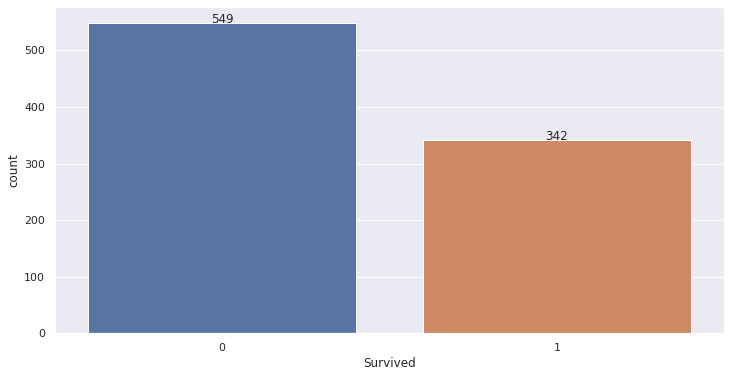

In [9]:
sns.set(style='darkgrid')
fig, ax1 = plt.subplots(figsize=(12,6))
graph = sns.countplot(ax = ax1, x ='Survived', data=df)
i=0
for p in graph.patches:
    graph.text(p.get_x()+0.4, p.get_height(), df['Survived'].value_counts()[i],
               ha="center")
    i += 1

Selanjutnya, kita bisa melakukan visualisasi distribusi data 'Fare' dan 'Age' sebagai berikut

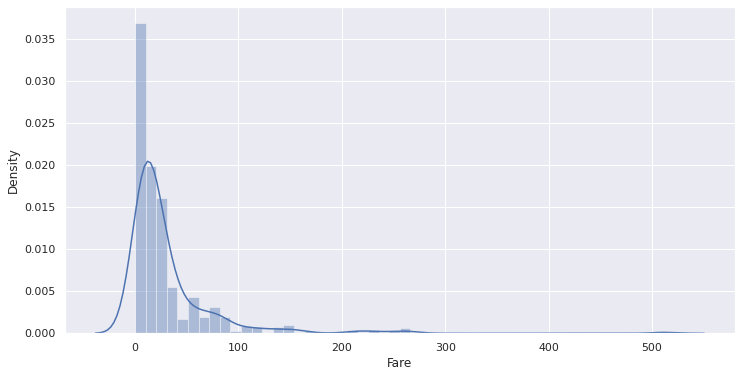

In [10]:
plt.figure(figsize=(12,6))
sns.set(style='darkgrid')
sns.distplot(df['Fare'])

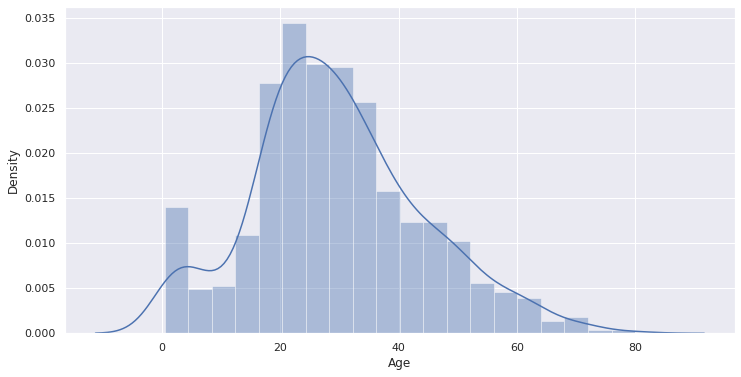

In [11]:
plt.figure(figsize=(12,6))
sns.set(style='darkgrid')
sns.distplot(df['Age'])

Terlihat bahwa distribusi data 'Fare' adalah *positively skewed* dari distribusi normal, dengan median yang lebih besar daripada rata-rata 'Fare'. Sementara itu, distribusi data 'Age' hampir menyerupai distribusi normal, namun sebenarnya *positively skewed* dan *bimodal*.

Dari statistik deskriptif di atas, terlihat kebanyakan penumpang berangkat dari 'S' atau Southampton dan titik embarkasi dengan penumpang kapal tersedikit adalah dari 'Q' atau Queenstown. Visualisasi dari data 'Embarked' selengkapnya adalah sebagai berikut:

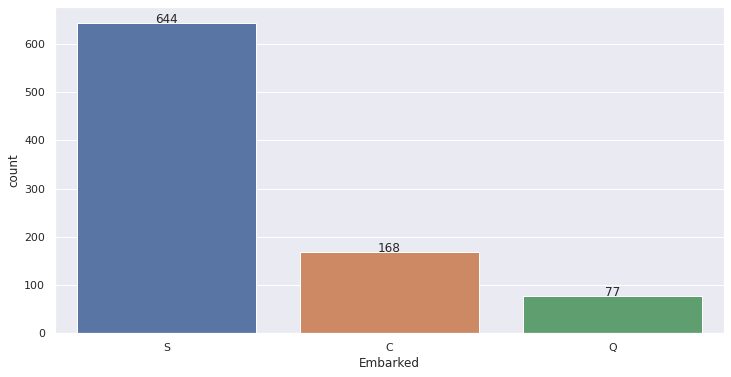

In [12]:
fig, ax1 = plt.subplots(figsize=(12,6))
graph = sns.countplot(ax = ax1, x ='Embarked', data=df)
i=0
for p in graph.patches:
    graph.text(p.get_x()+0.4, p.get_height(), df['Embarked'].value_counts()[i],ha="center")
    i += 1

Penumpang laki-laki dan perempuan yang selamat dapat divisualisasikan secara terpisah sebagai berikut:

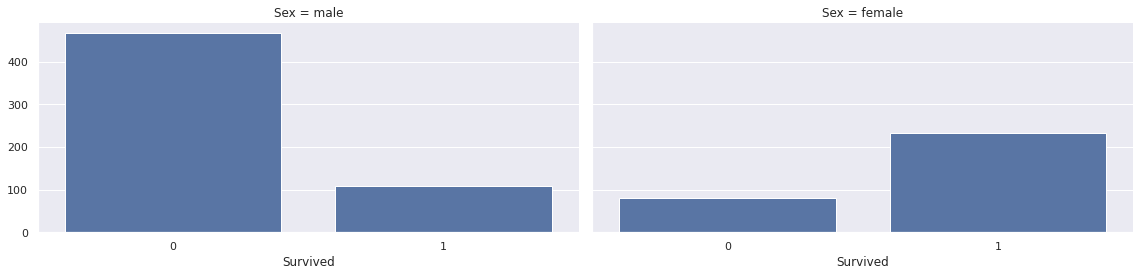

In [13]:
sns.FacetGrid(df, col='Sex', size = 4, aspect=2).map(sns.countplot, 'Survived')

Kedua grafik di atas menunjukkan bahwa **persentase perempuan yang selamat jauh lebih besar daripada laki-laki**. Ini bisa menjadi salah satu faktor utama untuk memprediksi kemungkinan seorang penumpang kapal akan selamat atau tidak.

Setiap penumpang membeli tiket kapal dengan harga yang berbeda-beda, mulai dari 0 sampai 512.33. Distribusi data 'Fare' untuk tiap-tiap laki-laki dan perempuan yang selamat maupun tidak selamat dapat divisualisasikan dengan *boxplot*:

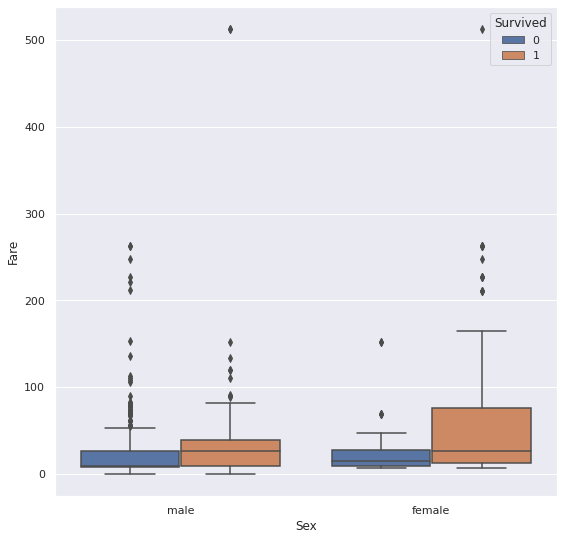

In [14]:
plt.figure(figsize=(9,9))
sns.set(style='darkgrid')
sns.boxplot(x='Sex', y='Fare', hue='Survived', data=df)

Grafik di atas menunjukkan bahwa:
1. Rata-rata 'Fare' penumpang laki-laki maupun perempuan yang selamat lebih tinggi daripada 'Fare' penumpang yang tidak selamat.
2. 'Fare' penumpang perempuan yang selamat lebih bervariasi ketimbang 'Fare' penumpang laki-laki yang selamat

Data dari kolom 'Fare' bisa menjadi salah satu faktor utama untuk memprediksi kemungkinan seorang penumpang kapal akan selamat atau tidak.

## Data Cleaning, Data Preprocessing, Feature Engineering & Further EDA

In [15]:
model_df = df.copy()
model_df.duplicated().any()

False

Sebelum data cleaning dimulai, data akan disalin dari 'df' ke 'model_df'. Lalu, 'model_df' akan dicek apakah ada data yang terduplikasi di dalamnya. Jika False, maka tidak ada data duplikasi di 'model_df', dan proses *preprocessing* selanjutnya bisa dilaksanakan

In [16]:
model_df.Name.head(10)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
5                                     Moran, Mr. James
6                              McCarthy, Mr. Timothy J
7                       Palsson, Master. Gosta Leonard
8    Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                  Nasser, Mrs. Nicholas (Adele Achem)
Name: Name, dtype: object

Di atas adalah 10 contoh nama yang terdapat di kolom 'Name'. Terlihat bahwa nama belakang tercantum terlebih dahulu, lalu diikuti dengan gelar dan *given name* penumpang tersebut. Gelar-gelar yang ada di sini berpotensi menjadi salah satu faktor utama untuk memprediksi kemungkinan seorang penumpang kapal akan selamat atau tidak, dengan anggapan bahwa penumpang dengan gelar kehormatan akan mendapatkan perhatian khusus dalam proses evakuasi setelah kecelakaan kapal. Gelar-gelar ini dapat di*extract* dari kolom 'Name' dan disimpan di kolom baru 'Title'.

In [17]:
# A function to get the title from a name.
model_df['Title'] = model_df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# Checking the title
pd.crosstab(model_df['Title'], model_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Dari tabel di atas, terlihat bahwa kebanyakan gelar berhubungan dengan jenis kelamin dari penumpang, sementara ada perempuan dan laki-laki yang sama-sama memiliki gelar 'Dr'.

Deskripsi gelar yang kurang lazim:

1. Master   - Anak laki-laki
2. Don - *Sir* dari Amerika Latin
3. Rev      - Pendeta
4. Dr       - Doktor
5. Mme      - *Madame* (*Mrs.* dalam Bahasa Prancis)
6. Ms - *Miss*
7. Major - Mayor
8. Lady - *Madam*
9. Sir - Gelar kehormatan untuk pria dari Inggris
10. Mlle     - *Mademoiselle* (*Miss* dalam Bahasa Prancis)
11. Col - Kolonel
12. Capt - Kapten
13. Countess - Gelar bangsawan untuk wanita dari Eropa
14. Jonkheer - Gelar bangsawan muda Belanda/Belgia

In [19]:
model_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs


In [21]:
pd.crosstab(model_df['Title'], model_df['Survived'])

Survived,0,1
Title,,
Capt,1,0
Col,1,1
Countess,0,1
Don,1,0
Dr,4,3
Jonkheer,1,0
Lady,0,1
Major,1,1
Master,17,23


Beberapa gelar yang terlihat di atas hanya berjumlah 1 di dataset ini, seperti 'Sir' dan 'Lady'. Gelar-gelar di atas dapat dikelompokan lagi agar fitur 'Title' yang baru dibuat bisa lebih bermakna dalam proses modeling nanti. 
1. 'Ms' bisa berarti sama dengan 'Miss'
2. 'Mlle' bisa berarti sama dengan 'Miss'
3. 'Mme' bisa berarti sama dengan 'Mrs'
4. 'Don' bisa berarti sama dengan 'Sir'
5. 'Major', 'Col' dan 'Capt' adalah gelar kemiliteran, jadi dapat dikelompokkan
6. 'Countess' bisa berarti sama dengan 'Lady'

In [22]:
model_df['Title'].replace('Ms','Miss',inplace=True)
model_df['Title'].replace('Mlle','Miss',inplace=True)
model_df['Title'].replace('Mme','Mrs',inplace=True)
model_df['Title'].replace('Don','Sir',inplace=True)
model_df['Title'].replace(['Major','Col','Capt'],'Military',inplace=True)
model_df['Title'].replace('Countess','Lady',inplace=True)

pd.crosstab(model_df['Title'], model_df['Survived'])

Survived,0,1
Title,,
Dr,4,3
Jonkheer,1,0
Lady,0,2
Master,17,23
Military,3,2
Miss,55,130
Mr,436,81
Mrs,26,100
Rev,6,0


Tabel di atas menunjukan jumlah penumpang yang selamat atau tidak yang memiliki tiap-tiap gelar di kolom 'Title'. Data dapat divisualisasikan lebih lanjut seperti ini:

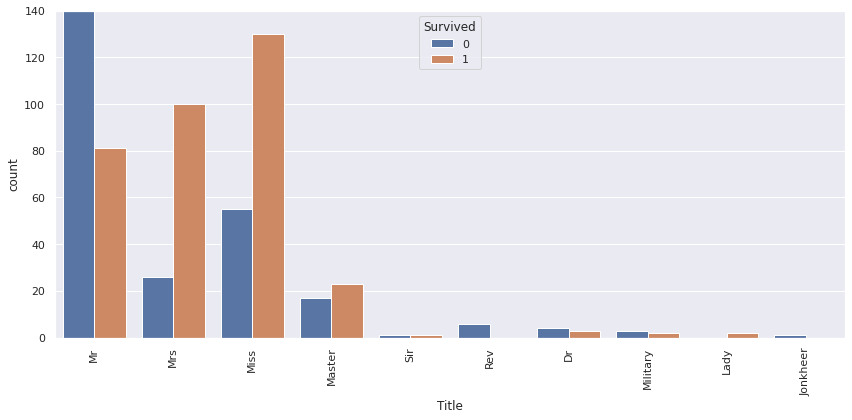

In [24]:
plt.figure(figsize=(12,6))
sns.set(style='darkgrid')
sns.countplot(x='Title',hue='Survived',data=model_df)
plt.xticks(rotation=90)
# Limit the y-axis range to enhance the visibility of all data from column 'Title'
plt.ylim(0, 140)
plt.tight_layout()

Beberapa nilai di 'model_df' adalah *missing values* yang ditandai dengan 'NaN'. Analisis persentase data yang merupakan *null values* di 'model_df' dapat dilakukan seperti berikut:

In [25]:
#percentage of missing values
round(model_df.isnull().sum()/df.shape[0]*100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
Title           0.00
dtype: float64

Kolom 'Age' memiliki 19.87% *missing values*. Kita bisa isi nilai-nilai yang hilang ini sesuai dengan nilai median (dikarenakan distribusi data 'Age' tidak normal) dari grup 'Title' yang sesuai dengan gelar penumpang tersebut.

In [26]:
# impute missing Age values using specific median of each Title group
title_ages = dict(model_df.groupby('Title')['Age'].median())
# create a column of the median ages
model_df['Median Age'] = model_df['Title'].apply(lambda x: title_ages[x])
# replace all missing ages with the value in this column
model_df['Age'].fillna(model_df['Median Age'], inplace=True)
#percentage of missing values
round(model_df.isnull().sum()/model_df.shape[0]*100, 2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
Title           0.00
Median Age      0.00
dtype: float64

Kolom 'Embarked' memiliki 0.22% *missing values*. Ada 2 penumpang yang tidak tercatat titik embarkasinya sebagai berikut:

In [27]:
model_df[model_df['Embarked'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Median Age
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss,21.0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs,35.0


In [28]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Karena kebanyakan penumpang berangkat dari 'S', bisa diperkirakan bahwa kedua penumpang di atas juga berangkat dari 'S'. Namun kita bisa telusuri lebih lanjut distribusi 'Fare' yang dibayarkan penumpang yang berangkat dari tiap-tiap titik embarkasi sebagai berikut:

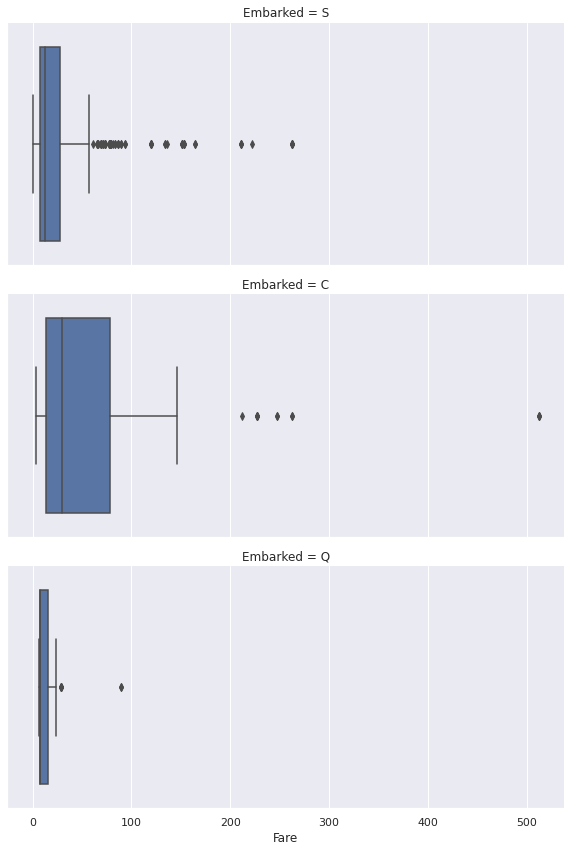

In [29]:
sns.set(style='darkgrid')
sns.FacetGrid(model_df, row='Embarked', size=4, aspect=2).map(sns.boxplot, 'Fare').add_legend()

Dikarenakan kedua penumpang di atas membayar 'Fare' sebesar 80.0, bisa diperkirakan bahwa kedua penumpang berangkat bukan dari 'S', melainkan dari 'C'. Ini karena nilai 80.0 di distribusi 'Fare' penumpang dari 'S' terdeteksi sebagai outlier, sementara nilai tersebut tidak terdeteksi sebagai outlier di distribusi 'Fare' penumpang 'C'. Bisa disimpulkan bahwa penumpang 62 dan 830 kemungkinan berangkat dari 'C'. 

In [30]:
#fill missing values in 'Embarked' with 'C'
model_df['Embarked'] = model_df['Embarked'].fillna('C')
#percentage of missing values
round(model_df.isnull().sum()/model_df.shape[0]*100, 2)

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.1
Embarked        0.0
Title           0.0
Median Age      0.0
dtype: float64

Terlihat bahwa kolom 'Cabin' memiliki 77.1% *missing values*. Jumlah ini terlalu besar untuk dimasukkan ke dalam analisa lebih lanjut, jadi saya memutuskan untuk tidak menggunakan data dari kolom ini.

Jumlah total anggota keluarga penumpang yang ikut berada di kapal bisa didapatkan dengan menjumlahkan nilai dari kolom 'SibSp' dan 'Parch', lalu disimpan dalam kolom baru 'FamilySize' sebagai berikut:

In [32]:
model_df['FamilySize'] = model_df['SibSp']+model_df['Parch']
model_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Median Age,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,30.0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,35.0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,21.0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,35.0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,30.0,0
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q,Mr,30.0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr,30.0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master,3.5,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,Mrs,35.0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs,35.0,1


Setelah membuat kolom 'FamilySize', kolom 'SibSp' dan 'Parch' tidak diperlukan lagi untuk analisa lanjutan. Saya memutuskan tidak akan menggunakan data dari kedua kolom ini lagi

Salah satu protokol evakuasi dalam kecelakaan kapal adalah "Save women and children first!", yang berarti **menyelamatkan nyawa penumpang perempuan dan anak-anak adalah prioritas utama**. Hal ini bisa menjadi salah satu faktor utama untuk memprediksi kemungkinan seorang penumpang kapal akan selamat atau tidak. Oleh karena itu, saya memutuskan untuk membuat kolom 'WomenAndChildren' yang bernilai 1 jika penumpang adalah perempuan atau anak-anak dan 0 jika bukan. 

In [33]:
model_df['WomenAndChildren'] = 1
model_df.loc[model_df['Sex']=='male', 'WomenAndChildren'] = 0 # All female included in Women and Children category
model_df.loc[model_df['Title']=='Master', 'WomenAndChildren'] = 1 # boy count
pd.crosstab(model_df['Title'], model_df['WomenAndChildren'])

WomenAndChildren,0,1
Title,,
Dr,6,1
Jonkheer,1,0
Lady,0,2
Master,0,40
Military,5,0
Miss,0,185
Mr,517,0
Mrs,0,126
Rev,6,0


Kolom-kolom yang dinilai tidak diperlukan lagi dapat dibuang dari 'model_df'.

In [34]:
model_df.drop(columns=['Name','Cabin','PassengerId', 'Ticket', 'Median Age', 'SibSp', 'Parch'], inplace=True)
model_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,WomenAndChildren
0,0,3,male,22.0,7.2500,S,Mr,1,0
1,1,1,female,38.0,71.2833,C,Mrs,1,1
2,1,3,female,26.0,7.9250,S,Miss,0,1
3,1,1,female,35.0,53.1000,S,Mrs,1,1
4,0,3,male,35.0,8.0500,S,Mr,0,0
5,0,3,male,30.0,8.4583,Q,Mr,0,0
6,0,1,male,54.0,51.8625,S,Mr,0,0
7,0,3,male,2.0,21.0750,S,Master,4,1
8,1,3,female,27.0,11.1333,S,Mrs,2,1
9,1,2,female,14.0,30.0708,C,Mrs,1,1


Data 'Fare' memiliki distribusi yang tidak normal. Saya memutuskan untuk membuat *bin* untuk data-data dari kolom ini. Dengan kata lain, 'Fare' akan dikelompokkan lagi menjadi 5 kelompok berbeda, dengan nilai 0 menunjukkan kelompok 'Fare' terendah dan 5 menunjukkan kelompok 'Fare' tertinggi. Pengelompokkan data menjadi 5 akan dilakukan berdasarkan statistik *quantiles* dari 'Fare' menggunakan fungsi qcut() dari Pandas.

In [35]:
from sklearn.preprocessing import LabelEncoder

df_bin = model_df.copy()
# Cut label into 5 category 
# Discretize variable into equal-sized buckets based on rank or based on sample quantiles
df_bin['FareBin'] = pd.qcut(df_bin.Fare, 5)

# Transform it by encoding
label = LabelEncoder()
df_bin['FareGroup'] = label.fit_transform(df_bin['FareBin'])
df_bin.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,WomenAndChildren,FareBin,FareGroup
0,0,3,male,22.0,7.2500,S,Mr,1,0,"(-0.001, 7.854]",0
1,1,1,female,38.0,71.2833,C,Mrs,1,1,"(39.688, 512.329]",4
2,1,3,female,26.0,7.9250,S,Miss,0,1,"(7.854, 10.5]",1
3,1,1,female,35.0,53.1000,S,Mrs,1,1,"(39.688, 512.329]",4
4,0,3,male,35.0,8.0500,S,Mr,0,0,"(7.854, 10.5]",1
5,0,3,male,30.0,8.4583,Q,Mr,0,0,"(7.854, 10.5]",1
6,0,1,male,54.0,51.8625,S,Mr,0,0,"(39.688, 512.329]",4
7,0,3,male,2.0,21.0750,S,Master,4,1,"(10.5, 21.679]",2
8,1,3,female,27.0,11.1333,S,Mrs,2,1,"(10.5, 21.679]",2
9,1,2,female,14.0,30.0708,C,Mrs,1,1,"(21.679, 39.688]",3


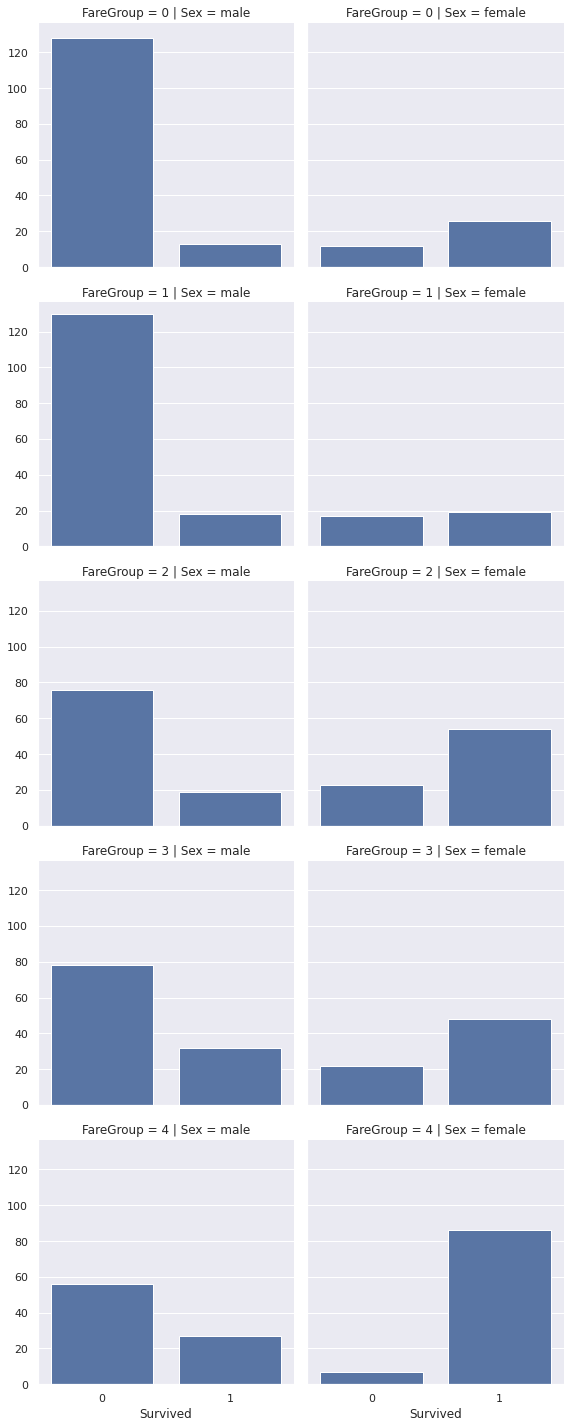

In [37]:
sns.set(style='darkgrid')
graph = sns.FacetGrid(df_bin, row='FareGroup', col='Sex', size=4, aspect=1).map(sns.countplot, 'Survived').add_legend()

Grafik di atas menunjukkan persentase penumpang yang selamat dikelompokkan berdasarkan jenis kelamin dan kelompok 'Fare'. Terlihat bahwa rata-rata persentase penumpang laki-laki dan perempuan yang selamat meningkat seiring dengan semakin tingginya kelompok 'Fare'. 

Data 'Age' memiliki distribusi yang tidak normal. Saya memutuskan untuk membuat *bin* untuk data-data dari kolom ini. Dengan kata lain, 'Age' akan dikelompokkan lagi menjadi 4 kelompok berbeda, dengan nilai 0 menunjukkan kelompok umur 0-20, 1 untuk umur 20-40, 2 untuk umur 40-60 dan 3 untuk umur 60-80.

In [41]:
# Make 4 age categories: 0 to 20, 20 to 40, 40 to 60, 60 to 80
df_bin['AgeBin'] = pd.cut(df_bin.Age, 4)

# Transform it by encoding
label = LabelEncoder()
df_bin['AgeGroup'] = label.fit_transform(df_bin['AgeBin'])
df_bin.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize,WomenAndChildren,FareBin,FareGroup,AgeBin,AgeGroup
0,0,3,male,22.0,7.2500,S,Mr,1,0,"(-0.001, 7.854]",0,"(20.315, 40.21]",1
1,1,1,female,38.0,71.2833,C,Mrs,1,1,"(39.688, 512.329]",4,"(20.315, 40.21]",1
2,1,3,female,26.0,7.9250,S,Miss,0,1,"(7.854, 10.5]",1,"(20.315, 40.21]",1
3,1,1,female,35.0,53.1000,S,Mrs,1,1,"(39.688, 512.329]",4,"(20.315, 40.21]",1
4,0,3,male,35.0,8.0500,S,Mr,0,0,"(7.854, 10.5]",1,"(20.315, 40.21]",1
5,0,3,male,30.0,8.4583,Q,Mr,0,0,"(7.854, 10.5]",1,"(20.315, 40.21]",1
6,0,1,male,54.0,51.8625,S,Mr,0,0,"(39.688, 512.329]",4,"(40.21, 60.105]",2
7,0,3,male,2.0,21.0750,S,Master,4,1,"(10.5, 21.679]",2,"(0.34, 20.315]",0
8,1,3,female,27.0,11.1333,S,Mrs,2,1,"(10.5, 21.679]",2,"(20.315, 40.21]",1
9,1,2,female,14.0,30.0708,C,Mrs,1,1,"(21.679, 39.688]",3,"(0.34, 20.315]",0


Selanjutnya, kolom-kolom yang tidak lagi relevan untuk analisa lanjutan dapat dibuang dari 'df_bin'. Data ini siap untuk encoding dan analisa lanjutan.

In [42]:
# Drop unnecessary attrs.
df_bin.drop(['FareBin','Fare','AgeBin','Age'], 1, inplace=True)
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Survived          891 non-null    category
 1   Pclass            891 non-null    category
 2   Sex               891 non-null    object  
 3   Embarked          891 non-null    object  
 4   Title             891 non-null    object  
 5   FamilySize        891 non-null    int64   
 6   WomenAndChildren  891 non-null    int64   
 7   FareGroup         891 non-null    object  
 8   AgeGroup          891 non-null    int64   
dtypes: category(2), int64(3), object(4)
memory usage: 50.8+ KB


In [43]:
df_bin.head(10)

,Survived,Pclass,Sex,Embarked,Title,FamilySize,WomenAndChildren,FareGroup,AgeGroup
0,0,3,male,S,Mr,1,0,0,1
1,1,1,female,C,Mrs,1,1,4,1
2,1,3,female,S,Miss,0,1,1,1
3,1,1,female,S,Mrs,1,1,4,1
4,0,3,male,S,Mr,0,0,1,1
5,0,3,male,Q,Mr,0,0,1,1
6,0,1,male,S,Mr,0,0,4,2
7,0,3,male,S,Master,4,1,2,0
8,1,3,female,S,Mrs,2,1,2,1
9,1,2,female,C,Mrs,1,1,3,0


## Data Encoding

Data dalam kolom 'Sex' dapat di*encode* menjadi nilai 1 untuk *male* dan 0 untuk *female* sebagai berikut:

In [44]:
#encode kolom Sex
label = LabelEncoder()
df_bin['Sex'] = label.fit_transform(df_bin['Sex']) #1 for male, 0 for female
df_bin.head(10)

,Survived,Pclass,Sex,Embarked,Title,FamilySize,WomenAndChildren,FareGroup,AgeGroup
0,0,3,1,S,Mr,1,0,0,1
1,1,1,0,C,Mrs,1,1,4,1
2,1,3,0,S,Miss,0,1,1,1
3,1,1,0,S,Mrs,1,1,4,1
4,0,3,1,S,Mr,0,0,1,1
5,0,3,1,Q,Mr,0,0,1,1
6,0,1,1,S,Mr,0,0,4,2
7,0,3,1,S,Master,4,1,2,0
8,1,3,0,S,Mrs,2,1,2,1
9,1,2,0,C,Mrs,1,1,3,0


Data dalam kolom 'Embarked' dapat di*encode* menjadi nilai 0 untuk 'C', 1 untuk 'Q' dan 2 untuk 'S' sebagai berikut:

In [45]:
df_bin['Embarked'] = label.fit_transform(df_bin['Embarked']) #0 for C, 1 for Q, 2 for S
df_bin.head(10)

,Survived,Pclass,Sex,Embarked,Title,FamilySize,WomenAndChildren,FareGroup,AgeGroup
0,0,3,1,2,Mr,1,0,0,1
1,1,1,0,0,Mrs,1,1,4,1
2,1,3,0,2,Miss,0,1,1,1
3,1,1,0,2,Mrs,1,1,4,1
4,0,3,1,2,Mr,0,0,1,1
5,0,3,1,1,Mr,0,0,1,1
6,0,1,1,2,Mr,0,0,4,2
7,0,3,1,2,Master,4,1,2,0
8,1,3,0,2,Mrs,2,1,2,1
9,1,2,0,0,Mrs,1,1,3,0


Selanjutnya, bisa dilakukan proses mendapatkan *dummies* dari kolom 'Title' sebagai berikut:

In [46]:
cat_cols=['Title']
int_cols=['FareGroup',
          'Embarked',
          'Pclass',
          'AgeGroup',
          'WomenAndChildren',
          'FamilySize',
          'Survived',
          'Sex']
df_bin[cat_cols] = df_bin[cat_cols].astype('category')
df_bin[int_cols] = df_bin[int_cols].astype('uint8')
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Survived          891 non-null    uint8   
 1   Pclass            891 non-null    uint8   
 2   Sex               891 non-null    uint8   
 3   Embarked          891 non-null    uint8   
 4   Title             891 non-null    category
 5   FamilySize        891 non-null    uint8   
 6   WomenAndChildren  891 non-null    uint8   
 7   FareGroup         891 non-null    uint8   
 8   AgeGroup          891 non-null    uint8   
dtypes: category(1), uint8(8)
memory usage: 8.3 KB


In [47]:
df_dummies = pd.get_dummies(df_bin)
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Survived          891 non-null    uint8
 1   Pclass            891 non-null    uint8
 2   Sex               891 non-null    uint8
 3   Embarked          891 non-null    uint8
 4   FamilySize        891 non-null    uint8
 5   WomenAndChildren  891 non-null    uint8
 6   FareGroup         891 non-null    uint8
 7   AgeGroup          891 non-null    uint8
 8   Title_Dr          891 non-null    uint8
 9   Title_Jonkheer    891 non-null    uint8
 10  Title_Lady        891 non-null    uint8
 11  Title_Master      891 non-null    uint8
 12  Title_Military    891 non-null    uint8
 13  Title_Miss        891 non-null    uint8
 14  Title_Mr          891 non-null    uint8
 15  Title_Mrs         891 non-null    uint8
 16  Title_Rev         891 non-null    uint8
 17  Title_Sir         891 non-null    u

Analisa korelasi tiap-tiap variabel di 'df_dummies' dapat divisualisasikan dengan heatmap sebagai berikut:

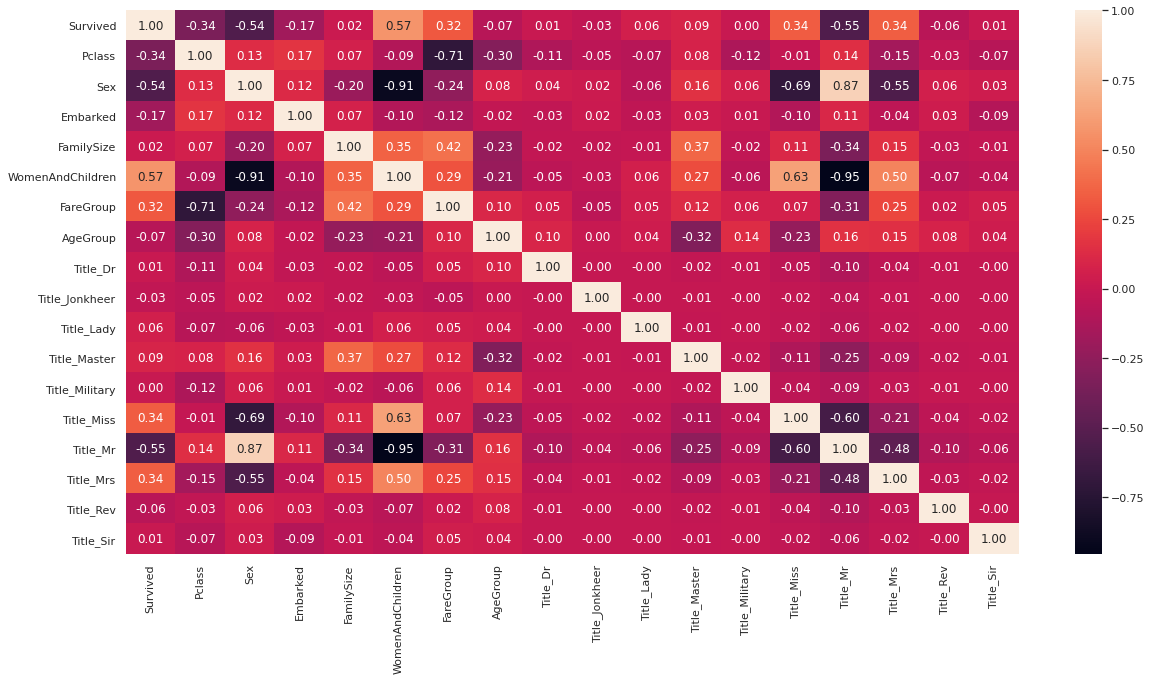

In [48]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_dummies.corr(), annot=True, fmt='.2f')

## Modeling

Pertama-tama, saya akan import library-library penunjang untuk proses modeling.

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score

Variabel target dan *predictor* akan dipisah dengan fungsi train_test_split().

In [50]:
y = df_bin['Survived'].copy()
X = df_dummies.drop(columns=['Survived']).copy()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

10 data training teratas setelah proses *split* adalah sebagai berikut:

In [51]:
X_train.head(10)

,Pclass,Sex,Embarked,FamilySize,WomenAndChildren,FareGroup,AgeGroup,Title_Dr,Title_Jonkheer,Title_Lady,Title_Master,Title_Military,Title_Miss,Title_Mr,Title_Mrs,Title_Rev,Title_Sir
331,1,1,2,0,0,3,2,0,0,0,0,0,0,1,0,0,0
733,2,1,2,0,0,2,1,0,0,0,0,0,0,1,0,0,0
382,3,1,2,0,0,1,1,0,0,0,0,0,0,1,0,0,0
704,3,1,2,1,0,0,1,0,0,0,0,0,0,1,0,0,0
813,3,0,2,6,1,3,0,0,0,0,0,0,1,0,0,0,0
118,1,1,0,1,0,4,1,0,0,0,0,0,0,1,0,0,0
536,1,1,2,0,0,3,2,0,0,0,0,1,0,0,0,0,0
361,2,1,0,1,0,3,1,0,0,0,0,0,0,1,0,0,0
29,3,1,2,0,0,1,1,0,0,0,0,0,0,1,0,0,0
55,1,1,2,0,0,3,1,0,0,0,0,0,0,1,0,0,0


Model klasifikasi yang akan diuji adalah:
1. Logistic Regression
2. Random Forest
3. Support Vector Machine
4. Gradient Boosting Classifier
5. XGBoost Classifier

### Logistic Regression

Accuracy: 0.8324
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       105
           1       0.79      0.81      0.80        74

    accuracy                           0.83       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.83      0.83      0.83       179



Text(0.5, 1.0, 'Accuracy: 83.24')

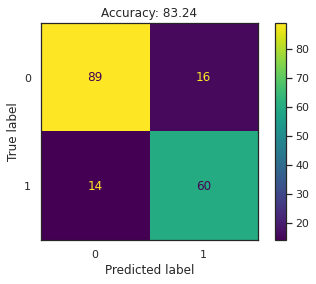

In [52]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_lr_pred = lr.predict(X_test)

print('Accuracy: %.4f' % accuracy_score(y_test, y_lr_pred))
print(classification_report(y_test,y_lr_pred))
sns.set(style='white')
plot_confusion_matrix(lr, X_test, y_test)
plt.title('Accuracy: {0}'.format(round(accuracy_score(y_test, y_lr_pred)*100, 2)))

Akurasi model Logistic Regression adalah 83.24% 
dengan AUC score sebesar 82.92



In [54]:
roc_auc_score(y_test, y_lr_pred)

0.8292149292149292

### Random Forest Classifier

Accuracy: 0.8492
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       105
           1       0.81      0.84      0.82        74

    accuracy                           0.85       179
   macro avg       0.84      0.85      0.85       179
weighted avg       0.85      0.85      0.85       179



Text(0.5, 1.0, 'Accuracy: 84.92')

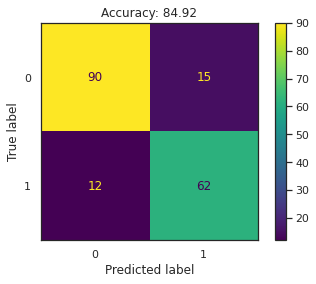

In [101]:
from sklearn.ensemble import RandomForestClassifier

rfor = RandomForestClassifier(oob_score = True, n_jobs = -1, random_state = 42)
rfor.fit(X_train, y_train)
y_rfor_pred = rfor.predict(X_test)

print('Accuracy: %.4f' % accuracy_score(y_test, y_rfor_pred))
print(classification_report(y_test,y_rfor_pred))
sns.set(style='white')
plot_confusion_matrix(rfor, X_test, y_test)
plt.title('Accuracy: {0}'.format(round(accuracy_score(y_test, y_rfor_pred)*100, 2)))

Akurasi model Random Forest adalah 84.92% 
dengan AUC score sebesar 84.75


In [59]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_rfor_pred)

0.8474903474903475

### Support Vector Machine (SVM)

Accuracy: 0.8268
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



Text(0.5, 1.0, 'Accuracy: 82.68')

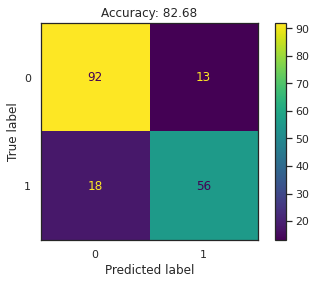

In [62]:
from sklearn.svm import SVC, LinearSVC

svc = SVC(random_state = 42)
svc.fit(X_train, y_train)
y_svc_pred = svc.predict(X_test)

print('Accuracy: %.4f' % accuracy_score(y_test, y_svc_pred))
print(classification_report(y_test,y_svc_pred))

plot_confusion_matrix(svc, X_test, y_test)
plt.title('Accuracy: {0}'.format(round(accuracy_score(y_test, y_svc_pred)*100, 2)))

Akurasi model SVM adalah 82.68% 
dengan AUC score sebesar 81.65


In [64]:
roc_auc_score(y_test, y_svc_pred)

0.8164736164736165

### Gradient Boosting Classifier

Accuracy: 0.8045
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Text(0.5, 1.0, 'Accuracy: 80.45')

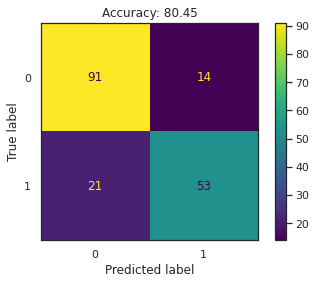

In [65]:
from sklearn.ensemble import GradientBoostingClassifier

gbm = GradientBoostingClassifier()
gbm.fit(X_train, y_train)
y_gbm_pred = gbm.predict(X_test)

print('Accuracy: %.4f' % accuracy_score(y_test, y_gbm_pred))
print(classification_report(y_test,y_gbm_pred))
sns.set(style='white')
plot_confusion_matrix(gbm, X_test, y_test)
plt.title('Accuracy: {0}'.format(round(accuracy_score(y_test, y_gbm_pred)*100, 2)))

Akurasi model Gradient Boosting Classifier adalah 80.45% 
dengan AUC score sebesar 79.14


In [66]:
roc_auc_score(y_test, y_gbm_pred)

0.7914414414414415

### XGBoost

Accuracy: 0.8045
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



Text(0.5, 1.0, 'Accuracy: 80.45')

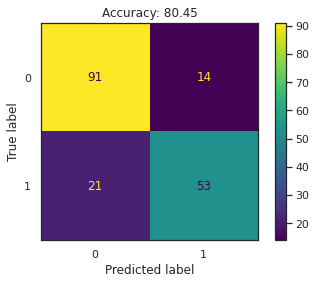

In [74]:
from xgboost import XGBClassifier

xgb = XGBClassifier(booster='gbtree',random_state = 42)
xgb.fit(X_train, y_train)
y_xgb_pred = xgb.predict(X_test)

print('Accuracy: %.4f' % accuracy_score(y_test, y_xgb_pred))
print(classification_report(y_test,y_xgb_pred))
sns.set(style='white')
plot_confusion_matrix(xgb, X_test, y_test)
plt.title('Accuracy: {0}'.format(round(accuracy_score(y_test, y_xgb_pred)*100, 2)))

Akurasi model XGBoost adalah 80.45% 
dengan AUC score sebesar 79.14

In [75]:
roc_auc_score(y_test, y_xgb_pred)

0.7914414414414415

## Model Evaluation

Untuk evaluasi tiap model, Stratified K-fold Cross Validation dapat dilakukan dengan 5 dan 10 fold sebagai berikut:

In [113]:
from sklearn.model_selection import cross_val_score
from sklearn import model_selection as ms

print('For Logistic Regression Model: ')
print('5-fold CV mean accuracy =',cross_val_score(lr, X, y, cv=ms.StratifiedKFold(n_splits=5, shuffle=True), n_jobs=-1).mean())
print('10-fold CV mean accuracy =',cross_val_score(lr, X, y, cv=ms.StratifiedKFold(n_splits=10, shuffle=True), n_jobs=-1).mean())

For Logistic Regression Model: 
5-fold CV mean accuracy = 0.8294080723118448
10-fold CV mean accuracy = 0.8293882646691635


In [114]:
print('For Random Forest Model: ')
print('5-fold CV mean accuracy =',cross_val_score(rfor, X, y, cv=ms.StratifiedKFold(n_splits=5, shuffle=True), n_jobs=-1).mean())
print('10-fold CV mean accuracy =',cross_val_score(rfor, X, y, cv=ms.StratifiedKFold(n_splits=10, shuffle=True), n_jobs=-1).mean())

For Random Forest Model: 
5-fold CV mean accuracy = 0.8103132257862031
10-fold CV mean accuracy = 0.8204119850187267


In [115]:
print('For SVM Model: ')
print('5-fold CV mean accuracy =',cross_val_score(svc, X, y, cv=ms.StratifiedKFold(n_splits=5, shuffle=True), n_jobs=-1).mean())
print('10-fold CV mean accuracy =',cross_val_score(svc, X, y, cv=ms.StratifiedKFold(n_splits=10, shuffle=True), n_jobs=-1).mean())

For SVM Model: 
5-fold CV mean accuracy = 0.8338585148452701
10-fold CV mean accuracy = 0.8349812734082397


In [116]:
print('For Gradient Boosting Classifier Model: ')
print('5-fold CV mean accuracy =',cross_val_score(gbm, X, y, cv=ms.StratifiedKFold(n_splits=5, shuffle=True), n_jobs=-1).mean())
print('10-fold CV mean accuracy =',cross_val_score(gbm, X, y, cv=ms.StratifiedKFold(n_splits=10, shuffle=True), n_jobs=-1).mean())

For Gradient Boosting Classifier Model: 
5-fold CV mean accuracy = 0.8215805661917018
10-fold CV mean accuracy = 0.8226466916354557


In [117]:
print('For XGBoost Model: ')
print('5-fold CV mean accuracy =',cross_val_score(xgb, X, y, cv=ms.StratifiedKFold(n_splits=5, shuffle=True), n_jobs=-1).mean())
print('10-fold CV mean accuracy =',cross_val_score(xgb, X, y, cv=ms.StratifiedKFold(n_splits=10, shuffle=True), n_jobs=-1).mean())

For XGBoost Model: 
5-fold CV mean accuracy = 0.8181783943255289
10-fold CV mean accuracy = 0.8282397003745319


## Hyperparameter Tuning & Model Comparison

Setelah melewati proses cross validation, saya memutuskan untuk melakukan hyperparameter tuning untuk model Random Forest, XGBoost dan SVM dengan GridSearchCV()

In [ ]:
# create a dictionary of parameters values we want to try
gridParams = {'criterion':['gini', 'entropy'],
              'n_estimators': [100, 500, 1000, 1500],
              'max_depth': [7, 10, 11, 12],
              'min_samples_split': [6, 8, 10],
              'min_samples_leaf': [3, 4, 5]}

# set GridSearchCV parameters
model = ms.GridSearchCV(rfor, gridParams, 
                        scoring='accuracy', verbose = 1, n_jobs = -1, 
                        cv = ms.StratifiedKFold(n_splits=5, shuffle=True))

# use training data
model.fit(X_train, y_train)

# print best score and best parameters combination
print(model.best_score_)
print(model.best_params_)

In [118]:
rfor_tuned = RandomForestClassifier(criterion = 'gini', max_depth = 12, min_samples_leaf = 3, 
                                    min_samples_split = 8, n_estimators = 100, oob_score = True, 
                                    n_jobs = -1, random_state=42)
rfor_tuned

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=12, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=True, random_state=42, verbose=0,
                       warm_start=False)

Accuracy: 0.8212
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



Text(0.5, 1.0, 'Accuracy: 82.12')

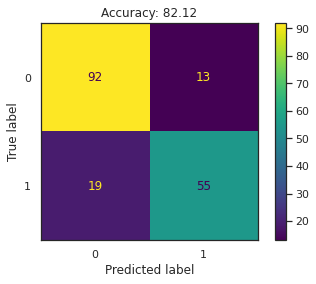

In [119]:
rfor_tuned.fit(X_train, y_train)
y_rfort_pred = rfor_tuned.predict(X_test)

print('Accuracy: %.4f' % accuracy_score(y_test, y_rfort_pred))
print(classification_report(y_test,y_rfort_pred))
sns.set(style='white')
plot_confusion_matrix(rfor_tuned, X_test, y_test)
plt.title('Accuracy: {0}'.format(round(accuracy_score(y_test, y_rfort_pred)*100, 2)))

In [121]:
print('5-fold mean accuracy for Random Forest = ',cross_val_score(rfor_tuned, X, y, cv=ms.StratifiedKFold(n_splits=5, shuffle=True), n_jobs=-1).mean())
print('10-fold mean accuracy for Random Forest = ',cross_val_score(rfor_tuned, X, y, cv=ms.StratifiedKFold(n_splits=10, shuffle=True), n_jobs=-1).mean())

5-fold mean accuracy for Random Forest =  0.8327663046889713
10-fold mean accuracy for Random Forest =  0.8328214731585518


Dengan hyperparameter tuning, nilai akurasi model Random Forest menurun 2.8%, namun setelah dilakukan 5- dan 10-fold cross validation, nilai rata-rata akurasi meningkat sekitar 1-2%. Kemungkinan hal ini terjadi dikarenakan overfitting model sebelum cross validation. 



In [ ]:
# create a dictionary of parameters values we want to try
optimization_dict = {'n_estimators': [200, 1000, 1800],
                     'max_depth': [4, 6, 8],
                     'learning_rate': [0.01, 0.1, 0.5],
                     'gamma': [0, 1, 5],
                     'min_child_weight':[3, 6, 10],
                     'subsample': [0.5, 0.8, 0.9]
                     }
# set GridSearchCV parameters
model = ms.GridSearchCV(xgb, optimization_dict, 
                     scoring='accuracy', verbose = 1, n_jobs = -1, 
                     cv = ms.StratifiedKFold(n_splits=5, shuffle=True))

# use training data
model.fit(X_train, y_train)
print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 729 candidates, totalling 3645 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 1792 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 2442 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed: 11.1min


0.8427361371023343
{'gamma': 0, 'learning_rate': 0.01, 'max_depth': 6, 'min_child_weight': 6, 'n_estimators': 200, 'subsample': 0.9}


[Parallel(n_jobs=-1)]: Done 3645 out of 3645 | elapsed: 12.6min finished


In [122]:
xgb_tuned = XGBClassifier(gamma=0,learning_rate=0.01,max_depth=6,
                          min_child_weight=6,n_estimators=200,subsample=0.9,
                          booster='gbtree',random_state = 42)
xgb_tuned

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=6, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.9, verbosity=1)

Accuracy: 0.8268
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       105
           1       0.83      0.73      0.78        74

    accuracy                           0.83       179
   macro avg       0.83      0.81      0.82       179
weighted avg       0.83      0.83      0.82       179



Text(0.5, 1.0, 'Accuracy: 82.68')

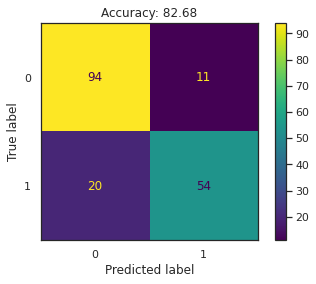

In [123]:
xgb_tuned.fit(X_train, y_train)
y_xgt_pred = xgb_tuned.predict(X_test)

print('Accuracy: %.4f' % accuracy_score(y_test, y_xgt_pred))
print(classification_report(y_test,y_xgt_pred))
sns.set(style='white')
plot_confusion_matrix(xgb_tuned, X_test, y_test)
plt.title('Accuracy: {0}'.format(round(accuracy_score(y_test, y_xgt_pred)*100, 2)))

In [125]:
print(cross_val_score(xgb_tuned, X, y, cv=ms.StratifiedKFold(n_splits=5, shuffle=True), n_jobs=-1).mean())
print(cross_val_score(xgb_tuned, X, y, cv=ms.StratifiedKFold(n_splits=10, shuffle=True), n_jobs=-1).mean())

0.8327914129684263
0.8282147315855182


Dengan hyperparameter tuning, nilai akurasi model XGBoost meningkat 2.23%. Setelah dilakukan 5- dan 10-fold cross validation, nilai rata-rata akurasi meningkat sekitar 1-2%.

In [110]:
# create a dictionary of parameters values we want to try
gridParams = {'C': [0.1, 1, 10, 100],
              'kernel':['rbf','linear'],
              'gamma': [1, 0.1, 0.01, 10, 0.001]
             }
# set GridSearchCV parameters
model = ms.GridSearchCV(svc, gridParams, 
                     scoring='accuracy', verbose = 1, n_jobs = -1, 
                     cv = ms.StratifiedKFold(n_splits=5, shuffle=True))

# use training data
model.fit(X_train, y_train)
print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


0.8357135821924555
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    7.0s finished


Accuracy: 0.8268
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



Text(0.5, 1.0, 'Accuracy: 82.68')

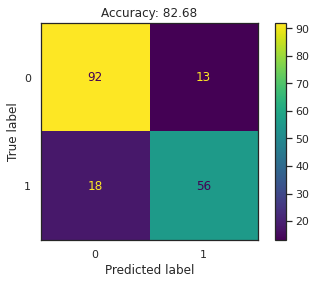

In [126]:
svc_tuned = SVC(C=1,gamma=0.1,kernel='rbf',random_state = 42)
svc_tuned.fit(X_train, y_train)
y_svct_pred = svc_tuned.predict(X_test)

print('Accuracy: %.4f' % accuracy_score(y_test, y_svct_pred))
print(classification_report(y_test,y_svct_pred))

plot_confusion_matrix(svc_tuned, X_test, y_test)
plt.title('Accuracy: {0}'.format(round(accuracy_score(y_test, y_svct_pred)*100, 2)))

In [127]:
print(cross_val_score(svc_tuned, X, y, cv=ms.StratifiedKFold(n_splits=5, shuffle=True), n_jobs=-1).mean())
print(cross_val_score(svc_tuned, X, y, cv=ms.StratifiedKFold(n_splits=10, shuffle=True), n_jobs=-1).mean())

0.8316301550436256
0.8339200998751559


Hyperparameter tuning tidak meningkatkan akurasi untuk model Support Vector Machine. 

**Kesimpulan** : Model Random Forest, Support Vector Machine dan XGBoost menghasilkan nilai akurasi yang setara untuk prediksi penumpang Titanic yang selamat, setelah dilakukan 5-fold dan 10-fold cross validation